# Basic of Signal

## Discrete Time Signals

- 보통 continuous time-domain / discrete time domain 으로 나눔
- 자연적인 신호는 아날로그로 연속 신호
- 이를 디지털화를 할 경우 이산 신호

__연속 신호를 샘플링하여 이산 신호로 디지털한 그래프 예제__
![연속 신호를 샘플링하여 이산 신호로 디지털한 그래프 예제](http://ataspinar.com/wp-content/uploads/2018/01/continious_signal_samples.png)



## Periodic Signals and Fourier Transform

- 신호에 반복되는 특정 패턴이 포함되어 있는 경우 주기적 신호라고 한다.
- 주기적 신호가 반복되는데 걸리는 시간을 P라고 하고 이 기간 동안 이동하는 거리를 파장(&lambda;)라고 한다.
- f = 빈도

$$
f=\frac{1}{P}=\frac{s}{\lambda}
$$



# Transformations between time-domain and frequency-domain(FFT, PSD, wavelet)

- 푸리에 분석은 __주기적으로__ 신호의 주기성을 분석하는데 사용한다.
- ex) 심장박동 측정 시 60 박동/분의 심박수 -> 주기 1s, 빈도 1Hz
      동시에 2초마다 손가락을 반복적으로 움식임 -> 주기 2s, 빈도 0.5Hz
      
      두 신호가 조합되어 측정
- 두개 이상의 다른 신호가 혼합되어 새로운 신호를 형성

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

t_n = 10
N = 1000
T = t_n / N
f_s = 1/T

x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)

f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)



In [13]:
print(composite_y_value)

[ 0.00000000e+00  6.76849022e+00  1.30277583e+01  1.83316081e+01
  2.23509581e+01  2.49114009e+01  2.60091288e+01  2.58033545e+01
  2.45868366e+01  2.27393159e+01  2.06710801e+01  1.87651525e+01
  1.73265594e+01  1.65457993e+01  1.64812550e+01  1.70622432e+01
  1.81111803e+01  1.93804709e+01  2.05976325e+01  2.15111771e+01
  2.19299971e+01  2.17503782e+01  2.09670345e+01  1.96673257e+01
  1.80106125e+01  1.61970704e+01  1.44318312e+01  1.28908287e+01
  1.16941271e+01  1.08909455e+01  1.04583498e+01  1.03130705e+01
  1.03335583e+01  1.03876241e+01  1.03601178e+01  1.01752334e+01
  9.80915078e+00  9.29062718e+00  8.68949050e+00  8.09534608e+00
  7.59075528e+00  7.22432985e+00  6.98938247e+00  6.81293049e+00
  6.55809481e+00  6.04056192e+00  5.05718752e+00  3.42246639e+00
  1.00689537e+00 -2.22947018e+00 -6.21456143e+00 -1.07577342e+01
 -1.55615044e+01 -2.02510892e+01 -2.44183182e+01 -2.76739799e+01
 -2.97010309e+01 -3.03006195e+01 -2.94236634e+01 -2.71826875e+01
 -2.38414790e+01 -1.97834

IndexError: list index out of range

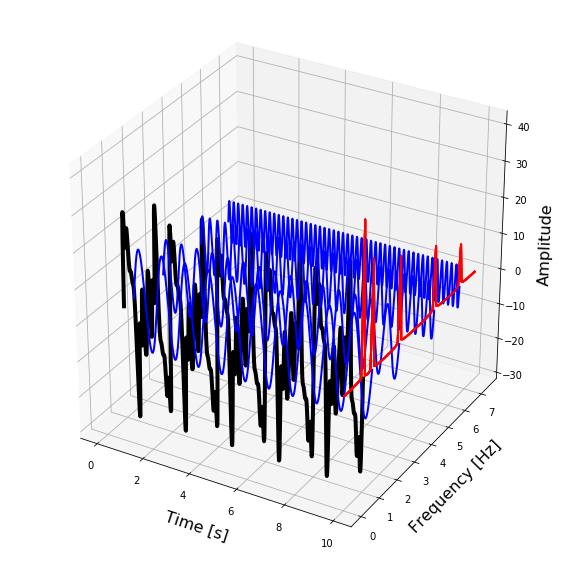

In [14]:
colors = ['k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\nTime [s]", fontsize=16)
ax.set_ylabel("\nFrequency [Hz]", fontsize=16)
ax.set_zlabel("\nAmplitude", fontsize=16)

y_values_ = [composite_y_value] + list(reversed(y_values))
frequencies = [1, 1.5, 3, 5, 6.5]

for ii in range(0,len(y_values_)):
    signal = y_values_[ii]
    color = colors[ii]
    length = signal.shape[0]
    x=np.linspace(0,10,1000)
    y=np.array([frequencies[ii]]*length)
    z=signal

    if ii == 0:
        linewidth = 4
    else:
        linewidth = 2
    ax.plot(list(x), list(y), zs=list(z), linewidth=linewidth, color=color)

    x=[10]*75
    y=f_values[:75]
    z = fft_values[:75]*3
    ax.plot(list(x), list(y), zs=list(z), linewidth=2, color='red')
    
    plt.tight_layout()
plt.show()

- 샘플링 속도가 높을수록 FFT가 계산할 수 있는 최대 주파수가 높아진다(?)